In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

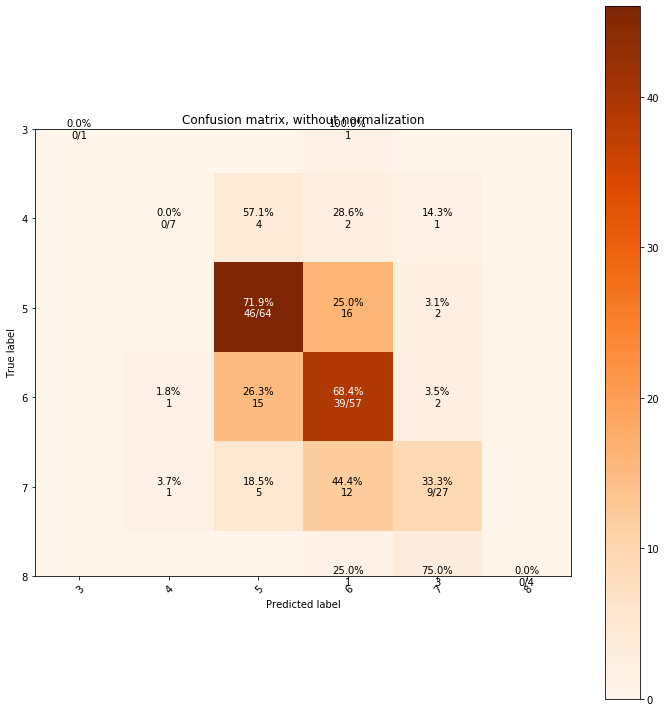

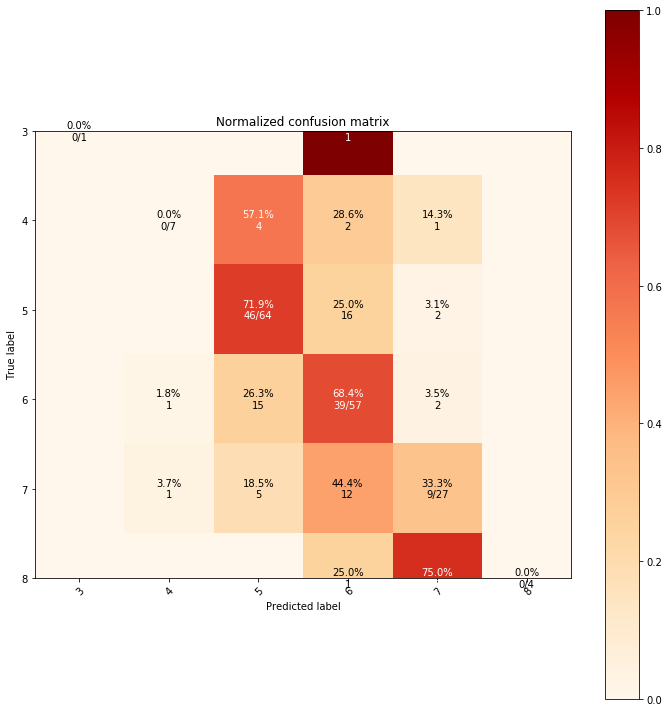

In [2]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    #######
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    
    ######
    # Only use the labels that appear in the data
    classes = np.unique(np.concatenate((np.unique(y_true),np.unique(y_pred))))#classes[unique_labels(y_true, y_pred)]
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
     #   print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            #ax.text(j, i, format(cm[i, j], fmt),
            ax.text(j, i, format(annot[i, j]),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

predTest = [6 , 6 , 7 , 6 , 6 , 5 , 6 , 5 , 7 , 6 , 6 , 5 , 5 , 5 , 6 , 5 , 5 , 5 , 6 , 5 , 4 , 5 , 5 , 5 , 5 , 6 , 5 , 6 , 6 , 6 , 6 , 6 , 5 , 6 , 5 , 6 , 6 , 6 , 5 , 6 , 5 , 5 , 7 , 5 , 5 , 5 , 6 , 6 , 5 , 5 , 5 , 5 , 6 , 7 , 6 , 5 , 6 , 6 , 6 , 6 , 5 , 4 , 5 , 7 , 5 , 5 , 5 , 6 , 5 , 7 , 5 , 5 , 5 , 5 , 5 , 7 , 6 , 6 , 5 , 5 , 6 , 6 , 5 , 5 , 6 , 7 , 6 , 6 , 6 , 5 , 5 , 6 , 5 , 7 , 6 , 5 , 6 , 5 , 6 , 5 , 6 , 5 , 5 , 6 , 5 , 5 , 7 , 7 , 5 , 6 , 6 , 6 , 6 , 6 , 5 , 6 , 6 , 6 , 7 , 7 , 5 , 6 , 6 , 7 , 6 , 5 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 5 , 5 , 5 , 6 , 5 , 6 , 6 , 5 , 5 , 5 , 5 , 5 , 6 , 5 , 5 , 6 , 6 , 6 , 7 , 7 , 6 , 5 , 5 , 5 , 6 , 7]
y_test = [6 , 7 , 7 , 5 , 5 , 5 , 7 , 5 , 7 , 6 , 6 , 4 , 5 , 6 , 5 , 6 , 5 , 6 , 5 , 5 , 6 , 7 , 5 , 6 , 5 , 6 , 5 , 5 , 5 , 6 , 6 , 7 , 5 , 5 , 6 , 6 , 5 , 6 , 5 , 6 , 5 , 5 , 7 , 5 , 4 , 5 , 6 , 6 , 6 , 7 , 5 , 5 , 4 , 7 , 6 , 6 , 7 , 6 , 8 , 6 , 4 , 7 , 6 , 6 , 5 , 5 , 6 , 5 , 5 , 8 , 6 , 5 , 5 , 7 , 6 , 5 , 6 , 7 , 5 , 5 , 6 , 6 , 6 , 6 , 7 , 7 , 6 , 6 , 6 , 5 , 5 , 6 , 5 , 8 , 6 , 5 , 5 , 5 , 6 , 5 , 5 , 5 , 5 , 7 , 5 , 5 , 5 , 6 , 5 , 7 , 6 , 6 , 5 , 6 , 4 , 6 , 3 , 6 , 7 , 7 , 5 , 5 , 6 , 7 , 6 , 5 , 6 , 5 , 6 , 6 , 6 , 6 , 6 , 7 , 5 , 5 , 5 , 6 , 5 , 5 , 7 , 5 , 7 , 5 , 5 , 5 , 7 , 5 , 5 , 4 , 6 , 5 , 4 , 7 , 6 , 6 , 6 , 7 , 7 , 8 ] 

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, predTest, classes=['1','2','5', '6', '7', '4', '8', '3','9','10'],
                      title='Confusion matrix, without normalization',
                     cmap = plt.cm.Oranges
                     )

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, predTest, classes=['1','2','5', '6', '7', '4', '8', '3','9','10'], normalize=True,
                     title='Normalized confusion matrix',
                     cmap = plt.cm.OrRd)

#TODAS AS CORES PRO CMAP PODEM SER ENCONTRADAS AQUI: https://matplotlib.org/examples/color/colormaps_reference.html
# As mais bonitas sao plt.cm.Oranges e plt.cm.OrRd

#plt.show()